In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as K
import tensorflow as tf
from src.models.train_model import train_resnet
from src.models.detectors import Detector
from tqdm import tqdm
from copy import deepcopy
from src.data.dataset_loaders import DatasetLoader, AerialCarsDatasetLoader
from typing import Tuple
from src.features.pipelines import RawImageToImage
from src.features.processors import NormImage, Resize
from src.data.image_loaders import AerialCarsSquareImageLoader
from src.models.classifiers import ResnetModelWrapper
from src.models.detectors import NNSliderDetector
from src.data.sliders import SlidingWindow
import matplotlib.pyplot as plt

## Aerial Cars Dataset

In [2]:
DATA_PATH = '../../data/processed/aerial-cars-dataset/data.pickle'

In [3]:
with open(DATA_PATH, 'rb') as f:
    data = pickle.load(f)

### ResNet training

In [4]:
model, history = train_resnet(data, epochs=10)

Epoch 1/10
6/6 [==============================] - 7s 1s/step - loss: 7.4871 - accuracy: 0.5068 - val_loss: 5.2156 - val_accuracy: 0.3485
Epoch 2/10
6/6 [==============================] - 7s 1s/step - loss: 2.8553 - accuracy: 0.6068 - val_loss: 2.2636 - val_accuracy: 0.5455
Epoch 3/10
6/6 [==============================] - 7s 1s/step - loss: 1.6359 - accuracy: 0.6847 - val_loss: 1.4360 - val_accuracy: 0.7273
Epoch 4/10
6/6 [==============================] - 7s 1s/step - loss: 1.1697 - accuracy: 0.7356 - val_loss: 0.6498 - val_accuracy: 0.7879
Epoch 5/10
6/6 [==============================] - 7s 1s/step - loss: 0.8669 - accuracy: 0.8102 - val_loss: 0.5113 - val_accuracy: 0.8030
Epoch 6/10
6/6 [==============================] - 7s 1s/step - loss: 0.6233 - accuracy: 0.8203 - val_loss: 0.4550 - val_accuracy: 0.9242
Epoch 7/10
6/6 [==============================] - 7s 1s/step - loss: 0.4638 - accuracy: 0.8627 - val_loss: 0.3358 - val_accuracy: 0.8485
Epoch 8/10
6/6 [=========================

### Validation

In [5]:
def validate_model(
    dataset_loader: DatasetLoader,
    input_folder_filepath: str,
    images_files_types: Tuple[str],
    annotations_files_types: Tuple[str],
    detector: Detector,
    workers: int = 0
):

    images = dataset_loader.load_dataset(
        input_folder_filepath,
        images_files_types,
        annotations_files_types,
        False
    )

    processed_images = []

    for image in tqdm(images):
        processed_images.append(
            detector(deepcopy(image), workers, False)
        )

    return processed_images

In [15]:
dataset_loader = AerialCarsDatasetLoader(
    image_loader=AerialCarsSquareImageLoader()
)

process_pipeline=RawImageToImage(
    processors=[
        Resize((100, 100)),
        NormImage()
    ]
)

sliding_window = SlidingWindow(
    step_size=50,
    window_size=(128, 128)
)

slider_detector = NNSliderDetector(
    sliding_window=sliding_window,
    process_pipeline=process_pipeline,
    classifier=ResnetModelWrapper(model),
    treshold=0.9
)

In [13]:
processed_images = validate_model(
    dataset_loader=dataset_loader,
    input_folder_filepath='../../data/raw/aerial-cars-dataset/val',
    images_files_types=('jpg', 'JPG', 'png'),
    annotations_files_types=('txt',),
    detector=slider_detector
)

  0%|          | 0/5 [00:00<?, ?it/s](215, 100, 100, 3)
(215, 100, 100, 3)
(214, 100, 100, 3)
(214, 100, 100, 3)
 20%|██        | 1/5 [00:13<00:52, 13.23s/it](215, 100, 100, 3)
(215, 100, 100, 3)
(214, 100, 100, 3)
(214, 100, 100, 3)
 40%|████      | 2/5 [00:26<00:39, 13.10s/it](195, 100, 100, 3)
(195, 100, 100, 3)
 60%|██████    | 3/5 [00:31<00:21, 10.90s/it](215, 100, 100, 3)
(215, 100, 100, 3)
(214, 100, 100, 3)
(214, 100, 100, 3)
 80%|████████  | 4/5 [00:44<00:11, 11.41s/it](200, 100, 100, 3)
(200, 100, 100, 3)
(200, 100, 100, 3)
(200, 100, 100, 3)
(200, 100, 100, 3)
(200, 100, 100, 3)
(200, 100, 100, 3)
(200, 100, 100, 3)
(200, 100, 100, 3)
(200, 100, 100, 3)
(200, 100, 100, 3)
(200, 100, 100, 3)
(200, 100, 100, 3)
(200, 100, 100, 3)
(200, 100, 100, 3)
(200, 100, 100, 3)
(200, 100, 100, 3)
(200, 100, 100, 3)
100%|██████████| 5/5 [01:37<00:00, 19.59s/it]


In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(processed_images[0][0])

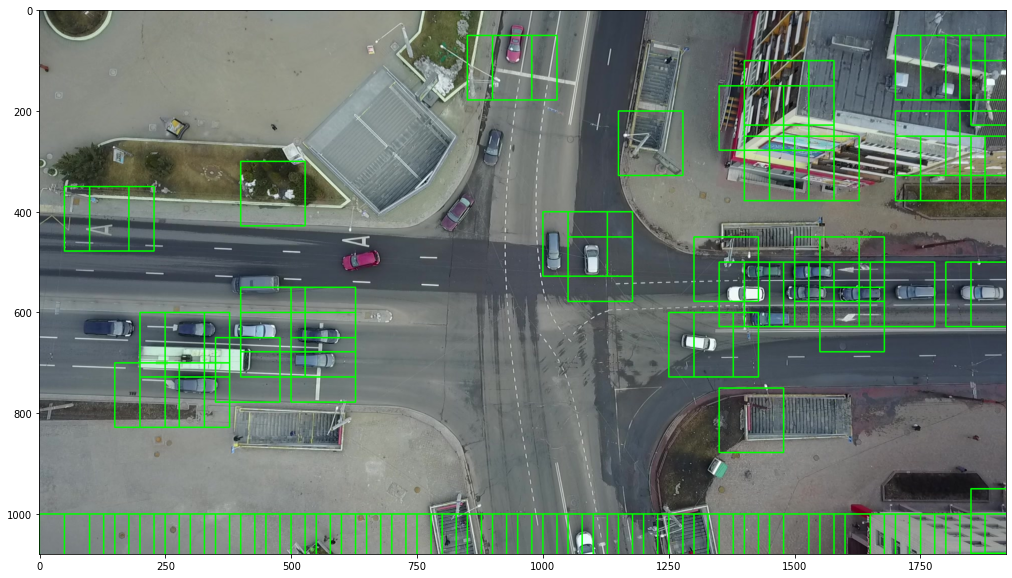

In [14]:
plt.figure(figsize=(20,10))
plt.imshow(processed_images[0][0])

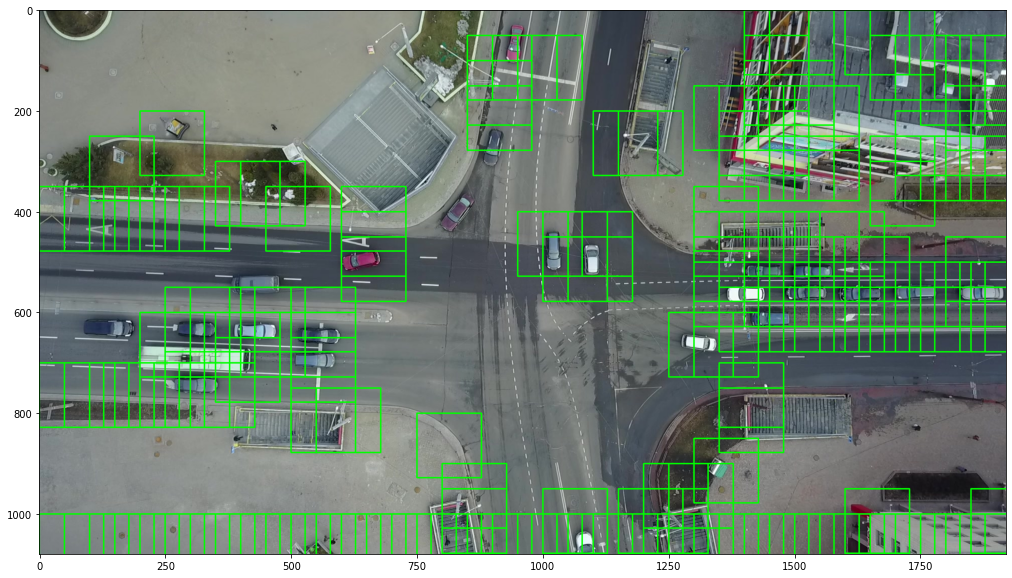

In [11]:
plt.figure(figsize=(20,10))
plt.imshow(processed_images[0][0])